Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import sqlite3
import folium

In [41]:
#importing csv files from previous notebooks

citybike_df = pd.read_csv('C:/Taslim/LHL/Python Project/citybike.csv',index_col=0)
#citybike_df.head()

foursquare_df = pd.read_csv('C:/Taslim/LHL/Python Project/foursquare.csv',index_col=0)
#foursquare_df.head()


yelp_df = pd.read_csv('C:/Taslim/LHL/Python Project//yelp.csv',index_col=0)
#yelp_df.head()


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [54]:
# Triming lat-long to increase join match
citybike_df['latitude'] = citybike_df['latitude'].round(3)
citybike_df['longitude'] = citybike_df['longitude'].round(3)

foursquare_df['latitude'] = foursquare_df['latitude'].round(3)
foursquare_df['longitude'] = foursquare_df['longitude'].round(3)

yelp_df['latitude'] = yelp_df['latitude'].round(3)
yelp_df['longitude'] = yelp_df['longitude'].round(3)


# Merting multiple dataframe
merged_df = pd.merge(citybike_df, foursquare_df, on=['latitude', 'longitude'],how='outer')
merged_df2 = pd.merge(merged_df, yelp_df, on=['latitude', 'longitude'],how='outer')
merged_df = merged_df.drop_duplicates(subset=['latitude', 'longitude','fsq_id'], keep='last')

#merged_df3 = pd.merge(merged_df2, merged_df2, on=['latitude', 'longitude'])
merged_df2.head()


,name_x,latitude,longitude,bikes_available,fsq_id,category_id,category_name,chains,distance_x,location_country,...,location_postcode,location_region,location_timezone,name_y,name,rating,review_count,price,distance_y,category
0,Queen St E / Woodward Ave,43.665,-79.32,13.0,4deb8ba688774880e3387c0c,17065.0,Farmers' Market,[],40.0,CA,...,NaN,ON,America/Toronto,Leslieville Farmers Market,Descendant Detroit Style Pizza,4.5,418.0,$$,1048.126922,NaN
1,Queen St E / Woodward Ave,43.665,-79.32,13.0,4deb8ba688774880e3387c0c,17065.0,Farmers' Market,[],40.0,CA,...,NaN,ON,America/Toronto,Leslieville Farmers Market,Maha's,4.0,572.0,$$,1005.190035,NaN
2,Queen St E / Woodward Ave,43.665,-79.32,13.0,4deb8ba688774880e3387c0c,17065.0,Farmers' Market,[],40.0,CA,...,NaN,ON,America/Toronto,Leslieville Farmers Market,The Burger's Priest,3.5,503.0,$$,374.238073,NaN
3,Queen St E / Woodward Ave,43.665,-79.32,13.0,4deb8ba688774880e3387c0c,17065.0,Farmers' Market,[],40.0,CA,...,NaN,ON,America/Toronto,Leslieville Farmers Market,Completo,4.5,169.0,$,1184.032903,NaN
4,Queen St E / Woodward Ave,43.665,-79.32,13.0,4deb8ba688774880e3387c0c,17065.0,Farmers' Market,[],40.0,CA,...,NaN,ON,America/Toronto,Leslieville Farmers Market,Ed's Real Scoop,4.5,209.0,$$,1854.179445,NaN


In [43]:
# Get the summary statistics of the data
print(merged_df2.describe())

          latitude    longitude  bikes_available   category_id  distance_x  \
count  1225.000000  1225.000000      1167.000000    528.000000  528.000000   
mean     43.665832   -79.384929         6.882605  14856.606061   62.392045   
std       0.021412     0.048172         5.247634   2646.578915   87.346307   
min      43.588000   -79.546000         0.000000  10004.000000    1.000000   
25%      43.656000   -79.403000         2.000000  13064.000000   17.000000   
50%      43.664000   -79.383000         6.000000  16000.000000   24.000000   
75%      43.674000   -79.376000         9.000000  17065.000000   63.000000   
max      43.788000   -79.124000        52.000000  19055.000000  581.000000   

           rating  review_count   distance_y  category  
count  520.000000    520.000000   520.000000       0.0  
mean     4.200962    721.182692  1189.970960       NaN  
std      0.315769    668.199605   777.628970       NaN  
min      3.500000     67.000000    16.625475       NaN  
25%      4.0

In [ ]:
# Create a map centered on the mean latitude and longitude
m = folium.Map(location=[merged_df2['latitude'].mean(), merged_df2['longitude'].mean()], zoom_start=13)

# Add a marker for each bike location
for index, row in merged_df2.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']],
                  popup=f"Bikes available: {row['bikes_available']}").add_to(m)

# Display the map
m

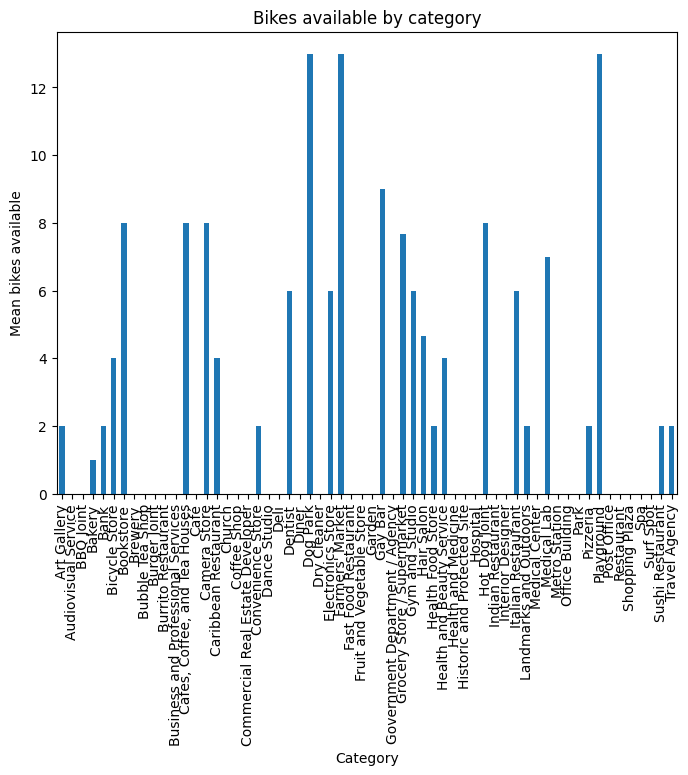

In [50]:
# Looking for any correlation between category of venue and no of bikes.
# We see the playground, farmer market and dog parks have more bikes available which means people are more likely to park bikes here before they use the venue
grouped = merged_df2.groupby('category_name')['bikes_available'].mean()

# create a histogram of the mean bikes_available for each category
grouped.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Category')
plt.ylabel('Mean bikes available')
plt.title('Bikes available by category')
plt.show()

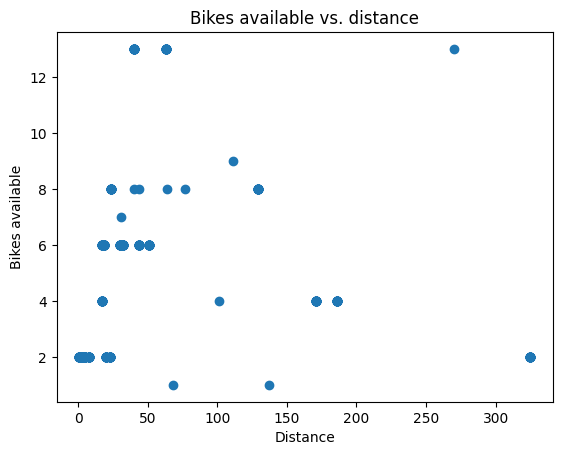

In [45]:
# create a scatter plot of bikes_available versus distance
# As we can see the distance from key venue increases the number of available bikes reduces. This means there is a likelyhood of finding more bikes near popular venue
plt.scatter(merged_df2['distance_x'], merged_df2['bikes_available'])
plt.xlabel('Distance')
plt.ylabel('Bikes available')
plt.title('Bikes available vs. distance')
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [52]:
# Connect to an SQLite database
conn = sqlite3.connect("database.sqlite")

# Store the Pandas dataframe into the SQLite database
merged_df2.to_sql("merged_data_2", conn, if_exists="replace")

# Close the connection to the SQLite database
conn.close()

Look at the data before and after the join to validate your data.